In [7]:
import pandas as pd 
import os 
import csv
import datetime as dt 

In [9]:
US_filepath = os.path.join("Resources\Raw Data\Table 2 - US_electricity_net_gen_from_renewable_en_1990_2020.csv")
USD_filepath = os.path.join("Resources\Raw Data\Table 3 - US-dollar-index-historical-chart.csv")

US_electricity = pd.read_csv(US_filepath)
USD_data = pd.read_csv(USD_filepath)

In [10]:
#isolating US_electricity data for only 2005 to 2019 data 

US_electricity = US_electricity.loc[(US_electricity["YYYYMM"] <= 201912) & (US_electricity["YYYYMM"] >= 200501) ]


In [11]:
#no days were provided in date data. Will assume data was collected at the first day of the month. 

US_electricity["YYYYMM"] = US_electricity['YYYYMM'].astype(str)

US_electricity["Date (YYYY-MM-01)"] = US_electricity["YYYYMM"]+str("01")

# there is a 13th month for the cumulative total. Removing this data. 

US_electricity["Month"] = US_electricity["YYYYMM"].str[-2:]
US_electricity["Month"] = US_electricity["Month"].astype(int)

US_electricity = US_electricity.loc[ US_electricity["Month"] != 13]


In [12]:
#clean up columns 
#US_electricity[unit] only includes million kilowatthours (can remove)

US_electricity = US_electricity.drop(columns=["YYYYMM", "Month", "MSN", "Column_Order", "Unit"])
US_electricity = US_electricity.rename(columns= {"Date (YYYY-MM-01)" : "Date"})


In [13]:
#format date to datetime objects 
US_electricity["Date"]=pd.to_datetime(US_electricity["Date"], format='%Y-%m-%d')

US_electricity.head()

,Value,Description,Date
440,177013.907,"Electricity Net Generation From Coal, All Sectors",2005-01-01
441,155818.014,"Electricity Net Generation From Coal, All Sectors",2005-02-01
442,163612.7,"Electricity Net Generation From Coal, All Sectors",2005-03-01
443,143083.239,"Electricity Net Generation From Coal, All Sectors",2005-04-01
444,153957.962,"Electricity Net Generation From Coal, All Sectors",2005-05-01


In [14]:
#Grouping by renewable energy and crude oil 
#Renewable sources include : hydroelectric pumped storage, wood, waste, geothermal, solar, and wind
#crude oil sources include: coal, petroleum, natural gas, other gases, and conventional hydroelectric power 

US_electricity = US_electricity.loc[US_electricity["Value"] != "Not Available"]

US_renewable = US_electricity.loc[ (US_electricity["Description"] == "Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors") | 
                                (US_electricity["Description"] == "Electricity Net Generation From Wood, All Sectors") | 
                                (US_electricity["Description"] == "Electricity Net Generation From Waste, All Sectors") |
                               (US_electricity["Description"] == "Electricity Net Generation From Geothermal, All Sectors") | 
                               (US_electricity["Description"] == "Electricity Net Generation From Solar, All Sectors") | 
                               (US_electricity["Description"] == "Electricity Net Generation From Wind, All Sectors")]

US_oil = US_electricity.loc[(US_electricity["Description"] == "Electricity Net Generation From Coal, All Sectors") |
                            (US_electricity["Description"] == "Electricity Net Generation From Petroleum, All Sectors") | 
                            (US_electricity["Description"] == "Electricity Net Generation From Natural Gas, All Sectors") |
                            (US_electricity["Description"] == "Electricity Net Generation From Other Gases, All Sectors") |
                            (US_electricity["Description"] == "Electricity Net Generation From Conventional Hydroelectric Power, All Sectors")]


In [15]:
# Cleaning data - need to remove top 30 rows in USD_data 
USD_data = USD_data.rename(columns = {"Macrotrends Data Download" : "Date", 
                                      "Unnamed: 1" : "Value"})
rows = list(range(0,15))
USD_data = USD_data.drop(rows)


In [16]:
USD_data["Date"]=pd.to_datetime(USD_data["Date"], format='%Y-%m-%d')

In [17]:
#isolating for 2005 to 2019 
sdate = dt.datetime(2005,1,1)   # start date
edate = dt.datetime(2019,12,30)   # end date

USD_data = USD_data [(USD_data["Date"]>=sdate ) & (USD_data["Date"]<= edate)]


In [18]:
#setting date as index

US_renewable = US_renewable.set_index(US_renewable["Date"])
US_renewable = US_renewable.drop(columns=["Date"])
US_renewable.head()

,Value,Description
Date,,
2005-01-01,-725.387,Electricity Net Generation From Hydroelectric ...
2005-02-01,-345.608,Electricity Net Generation From Hydroelectric ...
2005-03-01,-496.889,Electricity Net Generation From Hydroelectric ...
2005-04-01,-337.538,Electricity Net Generation From Hydroelectric ...
2005-05-01,-466.254,Electricity Net Generation From Hydroelectric ...


In [19]:
US_oil = US_oil.set_index(US_oil["Date"])
US_oil = US_oil.drop(columns=["Date"])
US_oil.head()

,Value,Description
Date,,
2005-01-01,177013.907,"Electricity Net Generation From Coal, All Sectors"
2005-02-01,155818.014,"Electricity Net Generation From Coal, All Sectors"
2005-03-01,163612.7,"Electricity Net Generation From Coal, All Sectors"
2005-04-01,143083.239,"Electricity Net Generation From Coal, All Sectors"
2005-05-01,153957.962,"Electricity Net Generation From Coal, All Sectors"


In [20]:
USD_data = USD_data.set_index(USD_data["Date"])
USD_data = USD_data.drop(columns=["Date"])
USD_data.head()

,Value
Date,
2005-01-01,95.45
2005-02-01,95.698
2005-03-01,95.307
2005-04-01,96.234
2005-05-01,96.47


In [21]:
#Exporting clean data set as CSV 

US_renewable.to_csv(r"Resources\Clean Data\US Electricity Production (Renewable Sources).csv", index=True)

US_oil.to_csv(r"Resources\Clean Data\US Electricity Production (Oil Sources).csv", index=True)

USD_data.to_csv(r"Resources\Clean Data\USD index.csv", index=True)

In [23]:
# pulling in clean data 

Table2a_filepath = os.path.join("Clean Data\Table 2a.csv")
Table2b_filepath = os.path.join("Clean Data\Table 2b.csv")
Table3_filepath = os.path.join("Clean Data\Table 3.csv")

US_renewable = pd.read_csv(Table2a_filepath)
US_oil = pd.read_csv(Table2b_filepath)
USD_data = pd.read_csv(Table3_filepath)

US_oil.head()

,Date,Value (million kWh),Description
0,2005-01-01,177013.907,"Electricity Net Generation From Coal, All Sectors"
1,2005-02-01,155818.014,"Electricity Net Generation From Coal, All Sectors"
2,2005-03-01,163612.700,"Electricity Net Generation From Coal, All Sectors"
3,2005-04-01,143083.239,"Electricity Net Generation From Coal, All Sectors"
4,2005-05-01,153957.962,"Electricity Net Generation From Coal, All Sectors"


In [24]:
US_oil["Description"].unique()

array(['Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Petroleum, All Sectors',
       'Electricity Net Generation From Natural Gas, All Sectors',
       'Electricity Net Generation From Other Gases, All Sectors',
       'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'],
      dtype=object)

In [25]:
#group by source types 

Coal = US_oil.loc[US_oil["Description"] == "Electricity Net Generation From Coal, All Sectors"]
Coal = Coal.rename(columns={"Value (million kWh)" : "Coal (mil kWh)"})
Coal = Coal.drop(columns=["Description"])

Petroleum = US_oil.loc[US_oil["Description"] == "Electricity Net Generation From Petroleum, All Sectors"]
Petroleum = Petroleum.rename(columns={"Value (million kWh)" : "Petroleum (mil kWh)"})
Petroleum = Petroleum.drop(columns=["Description"])

Natural_Gas = US_oil.loc[US_oil["Description"] == "Electricity Net Generation From Natural Gas, All Sectors"]
Natural_Gas = Natural_Gas.rename(columns={"Value (million kWh)" : "Natural_Gas (mil kWh)"})
Natural_Gas = Natural_Gas.drop(columns=["Description"])

Other_Gas = US_oil.loc[US_oil["Description"] == "Electricity Net Generation From Other Gases, All Sectors"]
Other_Gas = Other_Gas.rename(columns={"Value (million kWh)" : "Other_Gas (mil kWh)"})
Other_Gas = Other_Gas.drop(columns=["Description"])

Conv_Power = US_oil.loc[US_oil["Description"] == "Electricity Net Generation From Conventional Hydroelectric Power, All Sectors"]
Conv_Power = Conv_Power.rename(columns={"Value (million kWh)" : "Conventional Hydroelectric Power (mil kWh)"})
Conv_Power = Conv_Power.drop(columns=["Description"])

Coal.head()

,Date,Coal (mil kWh)
0,2005-01-01,177013.907
1,2005-02-01,155818.014
2,2005-03-01,163612.700
3,2005-04-01,143083.239
4,2005-05-01,153957.962


In [26]:
#combining data frames 

US_oil = Coal.merge(Petroleum, on="Date", how="left")
US_oil = US_oil.merge(Natural_Gas, on="Date", how="left")
US_oil = US_oil.merge(Other_Gas, on="Date", how="left")
US_oil = US_oil.merge(Conv_Power, on="Date", how="left")

US_oil = US_oil.set_index(["Date"])
US_oil.head()

,Coal (mil kWh),Petroleum (mil kWh),Natural_Gas (mil kWh),Other_Gas (mil kWh),Conventional Hydroelectric Power (mil kWh)
Date,,,,,
2005-01-01,177013.907,12190.178,51337.627,1126.191,24272.165
2005-02-01,155818.014,7314.510,44912.617,1076.051,21606.774
2005-03-01,163612.700,8351.900,51896.973,1214.487,22936.068
2005-04-01,143083.239,6952.153,52016.286,1121.459,23058.359
2005-05-01,153957.962,6713.918,54826.004,1191.303,27278.511


In [27]:
#changing data type so we can get the total sum
US_oil = US_oil.astype("float64")

In [28]:
#Getting total electricity production

US_oil["Total Oil (mil kWh)"] = US_oil.sum(axis=1)
US_oil.head()


,Coal (mil kWh),Petroleum (mil kWh),Natural_Gas (mil kWh),Other_Gas (mil kWh),Conventional Hydroelectric Power (mil kWh),Total Oil (mil kWh)
Date,,,,,,
2005-01-01,177013.907,12190.178,51337.627,1126.191,24272.165,265940.068
2005-02-01,155818.014,7314.510,44912.617,1076.051,21606.774,230727.966
2005-03-01,163612.700,8351.900,51896.973,1214.487,22936.068,248012.128
2005-04-01,143083.239,6952.153,52016.286,1121.459,23058.359,226231.496
2005-05-01,153957.962,6713.918,54826.004,1191.303,27278.511,243967.698


In [29]:
US_renewable["Description"].unique()

array(['Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors',
       'Electricity Net Generation From Wood, All Sectors',
       'Electricity Net Generation From Waste, All Sectors',
       'Electricity Net Generation From Geothermal, All Sectors',
       'Electricity Net Generation From Solar, All Sectors',
       'Electricity Net Generation From Wind, All Sectors'], dtype=object)

In [30]:
#group by source types 
#hydro electric pump is just a storage unit

wood = US_renewable.loc[US_renewable["Description"] == "Electricity Net Generation From Wood, All Sectors"]
wood = wood.rename(columns={"Value (million kWh)" : "Wood (mil kWh)"})
wood = wood.drop(columns=["Description"])

waste = US_renewable.loc[US_renewable["Description"] == "Electricity Net Generation From Waste, All Sectors"]
waste = waste.rename(columns={"Value (million kWh)" : "Waste (mil kWh)"})
waste = waste.drop(columns=["Description"])

geothermal = US_renewable.loc[US_renewable["Description"] == "Electricity Net Generation From Geothermal, All Sectors"]
geothermal = geothermal.rename(columns={"Value (million kWh)" : "Geothermal (mil kWh)"})
geothermal = geothermal.drop(columns=["Description"])

solar = US_renewable.loc[US_renewable["Description"] == "Electricity Net Generation From Solar, All Sectors"]
solar = solar.rename(columns={"Value (million kWh)" : "Solar (mil kWh)"})
solar = solar.drop(columns=["Description"])

wind = US_renewable.loc[US_renewable["Description"] == "Electricity Net Generation From Wind, All Sectors"]
wind = wind.rename(columns={"Value (million kWh)" : "Wind (mil kWh)"})
wind = wind.drop(columns=["Description"])

wind.head()

,Date,Wind (mil kWh)
900,2005-01-01,1131.569
901,2005-02-01,966.482
902,2005-03-01,1560.626
903,2005-04-01,1697.504
904,2005-05-01,1746.430


In [31]:
#combining data frames 

US_renewable = wood.merge(waste, on="Date", how="left")
US_renewable = US_renewable.merge(geothermal, on="Date", how="left")
US_renewable = US_renewable.merge(solar, on="Date", how="left")
US_renewable = US_renewable.merge(wind, on="Date", how="left")

US_renewable = US_renewable.set_index(["Date"])
US_renewable.head()

,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh)
Date,,,,,
2005-01-01,3333.076,1278.347,1252.144,8.668,1131.569
2005-02-01,3055.295,1123.407,1063.014,13.082,966.482
2005-03-01,3287.717,1277.929,1204.252,38.157,1560.626
2005-04-01,3035.547,1222.542,1187.134,58.263,1697.504
2005-05-01,3100.697,1351.152,1264.308,81.153,1746.430


In [32]:
#changing data type so we can get the total sum
US_renewable = US_renewable.astype("float64")

In [33]:
#Getting total electricity production

US_renewable["Total Renewable (mil kWh)"] = US_renewable.sum(axis=1)
US_renewable.head()

,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh),Total Renewable (mil kWh)
Date,,,,,,
2005-01-01,3333.076,1278.347,1252.144,8.668,1131.569,7003.804
2005-02-01,3055.295,1123.407,1063.014,13.082,966.482,6221.280
2005-03-01,3287.717,1277.929,1204.252,38.157,1560.626,7368.681
2005-04-01,3035.547,1222.542,1187.134,58.263,1697.504,7200.990
2005-05-01,3100.697,1351.152,1264.308,81.153,1746.430,7543.740


In [34]:
#Set index as data 
USD_data = USD_data.set_index(["Date"], drop=True)
USD_data.head()

,Value
Date,
2005-01-01,95.450
2005-02-01,95.698
2005-03-01,95.307
2005-04-01,96.234
2005-05-01,96.470


In [35]:
#rename column name 
USD_data = USD_data.rename( columns={ "Value" : "USD Index"})
USD_data.head()

,USD Index
Date,
2005-01-01,95.450
2005-02-01,95.698
2005-03-01,95.307
2005-04-01,96.234
2005-05-01,96.470


In [36]:
part3 = USD_data.merge(US_renewable, on="Date", how="left")
part3 = part3.merge(US_oil, on="Date", how="left")

part3.head()

,USD Index,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh),Total Renewable (mil kWh),Coal (mil kWh),Petroleum (mil kWh),Natural_Gas (mil kWh),Other_Gas (mil kWh),Conventional Hydroelectric Power (mil kWh),Total Oil (mil kWh)
Date,,,,,,,,,,,,,
2005-01-01,95.450,3333.076,1278.347,1252.144,8.668,1131.569,7003.804,177013.907,12190.178,51337.627,1126.191,24272.165,265940.068
2005-02-01,95.698,3055.295,1123.407,1063.014,13.082,966.482,6221.280,155818.014,7314.510,44912.617,1076.051,21606.774,230727.966
2005-03-01,95.307,3287.717,1277.929,1204.252,38.157,1560.626,7368.681,163612.700,8351.900,51896.973,1214.487,22936.068,248012.128
2005-04-01,96.234,3035.547,1222.542,1187.134,58.263,1697.504,7200.990,143083.239,6952.153,52016.286,1121.459,23058.359,226231.496
2005-05-01,96.470,3100.697,1351.152,1264.308,81.153,1746.430,7543.740,153957.962,6713.918,54826.004,1191.303,27278.511,243967.698


In [38]:
#Exporting to CSV file
part3.to_csv('Transformed Data\Part 3.csv')


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt

In [40]:
#pulling in transformed files 

#renewable production vs. oil production over time 
data_filepath = "Transformed Data\Part 3.csv"
data = pd.read_csv(data_filepath)

data.head()

,Date,USD Index,Wood (mil kWh),Waste (mil kWh),Geothermal (mil kWh),Solar (mil kWh),Wind (mil kWh),Total Renewable (mil kWh),Coal (mil kWh),Petroleum (mil kWh),Natural_Gas (mil kWh),Other_Gas (mil kWh),Conventional Hydroelectric Power (mil kWh),Total Oil (mil kWh)
0,2005-01-01,95.450,3333.076,1278.347,1252.144,8.668,1131.569,7003.804,177013.907,12190.178,51337.627,1126.191,24272.165,265940.068
1,2005-02-01,95.698,3055.295,1123.407,1063.014,13.082,966.482,6221.280,155818.014,7314.510,44912.617,1076.051,21606.774,230727.966
2,2005-03-01,95.307,3287.717,1277.929,1204.252,38.157,1560.626,7368.681,163612.700,8351.900,51896.973,1214.487,22936.068,248012.128
3,2005-04-01,96.234,3035.547,1222.542,1187.134,58.263,1697.504,7200.990,143083.239,6952.153,52016.286,1121.459,23058.359,226231.496
4,2005-05-01,96.470,3100.697,1351.152,1264.308,81.153,1746.430,7543.740,153957.962,6713.918,54826.004,1191.303,27278.511,243967.698


## Q5. Electricity production from renewable sources over time in the US.

analyzing electricity production over 2005 to 2019, looking at the contribution of the different sources. 

### Looking at electricity production from renewable sources

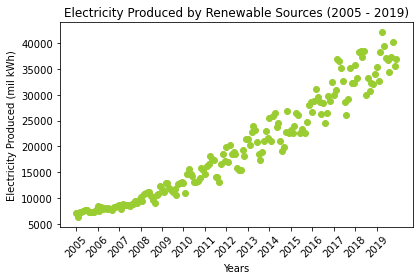

In [47]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(data["Date"]), 12)

plt.scatter(data["Date"], data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources (2005 - 2019)")
plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable.png")


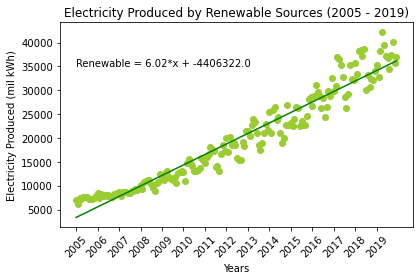

In [46]:
# regression analysis
data["Date_ordinal"] = pd.to_datetime(data["Date"]).apply(lambda date: date.toordinal())

r_slope, r_intercept, r_rvalue, r_pvalue, r_stderr = stats.linregress(data["Date_ordinal"], data["Total Renewable (mil kWh)"])
regressed_renewable = data["Date_ordinal"] * r_slope + r_intercept 

plt.annotate(f"Renewable = {round(r_slope,2)}*x + {round(r_intercept,0)}", (0,35000))
plt.scatter(data["Date"], data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.plot(data["Date"], regressed_renewable, color="green")
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources (2005 - 2019)")

plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable (with Regression).png")


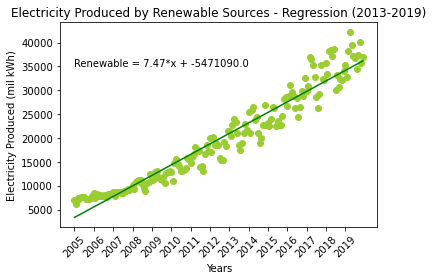

In [45]:
# regression analysis accounting from 2013 to 2019
data["Date_ordinal"] = pd.to_datetime(data["Date"]).apply(lambda date: date.toordinal())

r2_slope, r2_intercept, r2_rvalue, r2_pvalue, r2_stderr = stats.linregress(data["Date_ordinal"][-84:], data["Total Renewable (mil kWh)"][-84:])
regressed_renewable = data["Date_ordinal"] * r_slope + r_intercept 

plt.scatter(data["Date"], data["Total Renewable (mil kWh)"], color="yellowgreen")
plt.plot(data["Date"], regressed_renewable, color="green")

plt.annotate(f"Renewable = {round(r2_slope,2)}*x + {round(r2_intercept,0)}", (0,35000))
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced by Renewable Sources - Regression (2013-2019)")

plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Renewable (with Regression - 2013 to 2019).png")

### Comparing oil production and renewable source production of electricity


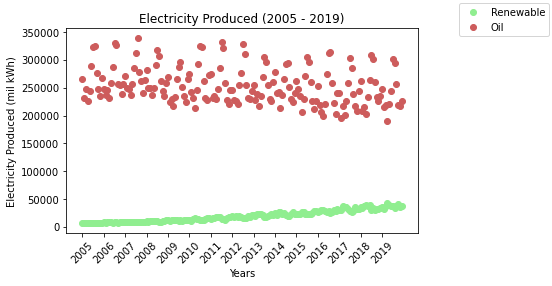

In [48]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(data["Date"]), 12)

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="indianred", label="Oil")
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced (2005 - 2019)")
plt.tight_layout()

plt.savefig("Plots\Question 5 - time vs. Oil and Renewable.png", bbox_inches='tight')



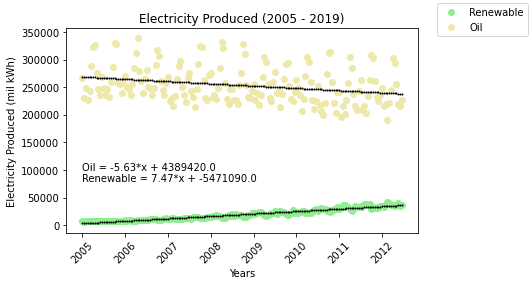

In [59]:
#Regression Analysis 

o_slope, o_intercept, o_rvalue, o_pvalue, o_stderr = stats.linregress(data["Date_ordinal"], data["Total Oil (mil kWh)"])
regressed_oil = data["Date_ordinal"] * o_slope + o_intercept 

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="palegoldenrod", label="Oil")
ax1.scatter(data["Date"], regressed_oil, c="black", s=1)
ax1.scatter(data["Date"], regressed_renewable, c="black", s=1)

plt.annotate(f"Renewable = {round(r2_slope,2)}*x + {round(r2_intercept,0)}", (0,80000))
plt.annotate(f"Oil = {round(o_slope,2)}*x + {round(o_intercept,0)}", (0,100000))
fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced (2005 - 2019)")

plt.tight_layout()

plt.savefig("Plots\Question 5 - Time vs. Oil and Renewable (with Regression).png", bbox_inches='tight')


In [50]:
#intercept of when renewable production = oil production 

#regressed_oil = renewable_oil["Date_ordinal"] * o_slope + o_intercept 
#regressed_renewable = renewable_oil["Date_ordinal"] * r_slope + r_intercept 

intercept = (o_intercept-r2_intercept)/(r2_slope-o_slope)

dt.date.fromordinal(int(intercept))

#If the trend from 2013 onwards is maintained, it is predicted that electricity from renewable sources will surpass oil sources in 2016. 

datetime.date(2061, 9, 19)

### Analysis on types of renewable sources

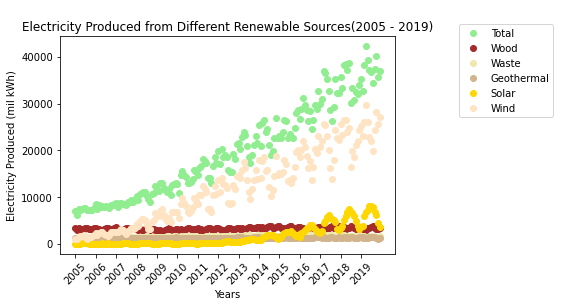

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Total")
ax1.scatter(data["Date"], data["Wood (mil kWh)"], c="brown", label="Wood")
ax1.scatter(data["Date"], data["Waste (mil kWh)"], c="palegoldenrod", label="Waste")
ax1.scatter(data["Date"], data["Geothermal (mil kWh)"], c="tan", label="Geothermal")
ax1.scatter(data["Date"], data["Solar (mil kWh)"], c="gold", label="Solar")
ax1.scatter(data["Date"], data["Wind (mil kWh)"], c="bisque", label="Wind")

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced from Different Renewable Sources(2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Types of Renewable Sources.png", bbox_inches='tight')

### Analysis on types of oil sources

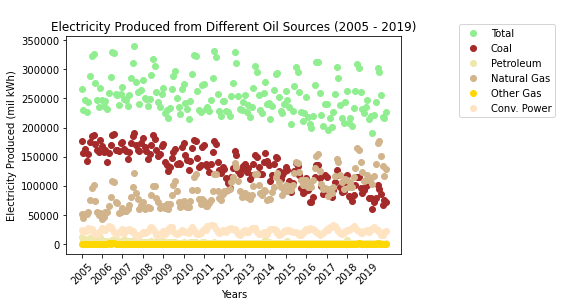

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="lightgreen", label="Total")
ax1.scatter(data["Date"], data["Coal (mil kWh)"], c="brown", label="Coal")
ax1.scatter(data["Date"], data["Petroleum (mil kWh)"], c="palegoldenrod", label="Petroleum")
ax1.scatter(data["Date"], data["Natural_Gas (mil kWh)"], c="tan", label="Natural Gas")
ax1.scatter(data["Date"], data["Other_Gas (mil kWh)"], c="gold", label="Other Gas")
ax1.scatter(data["Date"], data["Conventional Hydroelectric Power (mil kWh)"], c="bisque", label="Conv. Power")

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Electricity Produced (mil kWh)")
plt.xlabel("Years")
plt.xticks(ticks, years, rotation=45)
plt.title("Electricity Produced from Different Oil Sources (2005 - 2019)")

plt.savefig("Plots\Question 5 - Time vs. Types of Oil Sources.png", bbox_inches='tight')

## Effect of US electricity production from renewable sources on the US dollar (index).

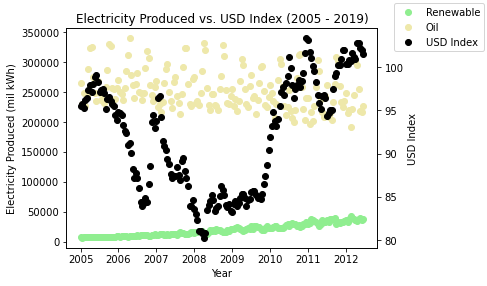

In [56]:
# major ticks for x-axis (by year)
years = np.arange(2005, 2020, 1)
ticks = np.arange(0, len(data["Date"]), 24)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.scatter(data["Date"], data["Total Renewable (mil kWh)"], c="lightgreen", label="Renewable")
ax1.scatter(data["Date"], data["Total Oil (mil kWh)"], c="palegoldenrod", label="Oil")

plt.ylabel("Electricity Produced (mil kWh)")

ax2 = ax1.twinx() 

ax2.set_ylabel("USD Index")
lns3=ax2.scatter(data["Date"], data["USD Index"], c="black", label="USD Index")

plt.xticks(ticks, years, rotation = 45)
fig.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
plt.ylabel("USD Index")

plt.xlabel("Years")
plt.title("Electricity Produced vs. USD Index (2005 - 2019)")

plt.tight_layout()

plt.savefig("Plots\Question 6 - Sources vs. USD Index.png", bbox_inches='tight')
